# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'
NDIM = 4  # Dimensionality of parameter z
NROUNDS = 5  # Optimization rounds

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.01):
    x = np.linspace(-5, 5, 50)
    t = np.sin(x)*z[0]
    t += np.cos(x)*z[1]
    t += np.sin(2*x)*z[2]
    t += np.cos(2*x)*z[3]
    n = np.random.randn(*t.shape)*sigma
    return t + n

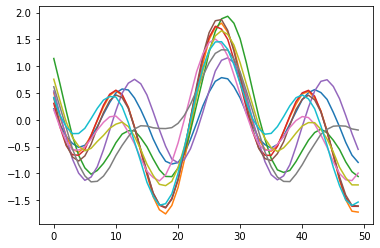

In [4]:
for i in range(10):
    z = np.random.rand(NDIM)
    x = model(z)
    plt.plot(x)

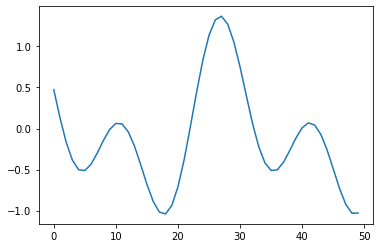

In [5]:
z0 = np.ones(NDIM)*0.5
x0 = model(z0, sigma = 1e-6)
plt.plot(x0)

In [6]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [7]:
for i in range(NROUNDS):
    sw.round(n_sims = 10000, n_train = 10000, lr = 1e-4, n_particles = 1)

  9%|▊         | 874/10000 [00:00<00:01, 8734.95it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  0%|          | 0/10000 [00:00<?, ?it/s]

Network optimization


100%|██████████| 10000/10000 [02:21<00:00, 70.56it/s]


Round:  1
Generate samples from constrained prior: z~pc(z)


  9%|▊         | 873/10000 [00:00<00:01, 8728.34it/s]

Constrained posterior volume: 0.009227823176
Generate corresponding draws x ~ p(x|z)


  0%|          | 8/10000 [00:00<02:21, 70.62it/s]

Network optimization


100%|██████████| 10000/10000 [02:25<00:00, 68.86it/s]


Round:  2
Generate samples from constrained prior: z~pc(z)


  9%|▉         | 918/10000 [00:00<00:00, 9178.74it/s]

Constrained posterior volume: 5.903039999999998e-05
Generate corresponding draws x ~ p(x|z)


  0%|          | 7/10000 [00:00<02:25, 68.79it/s]

Network optimization


100%|██████████| 10000/10000 [02:24<00:00, 68.97it/s]


Round:  3
Generate samples from constrained prior: z~pc(z)


  9%|▉         | 878/10000 [00:00<00:01, 8778.84it/s]

Constrained posterior volume: 7.406448000000001e-06
Generate corresponding draws x ~ p(x|z)


  0%|          | 7/10000 [00:00<02:28, 67.43it/s]

Network optimization


100%|██████████| 10000/10000 [02:30<00:00, 66.46it/s]


Round:  4
Generate samples from constrained prior: z~pc(z)


  9%|▉         | 900/10000 [00:00<00:01, 8997.80it/s]

Constrained posterior volume: 4.286464e-06
Generate corresponding draws x ~ p(x|z)


  0%|          | 7/10000 [00:00<02:29, 66.98it/s]

Network optimization


100%|██████████| 10000/10000 [02:28<00:00, 67.36it/s]


In [6]:
for i, c in enumerate(['0.8', 'g', 'y', 'm', 'k']):
    xz = sw.xz_store[i]
    x = swyft.get_x(xz)
    for spec in x[:20]:
        plt.plot(spec, color=c)
plt.plot(x0, color='r', lw=2)

NameError: name 'sw' is not defined

In [14]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

(-5.0, 0.0)

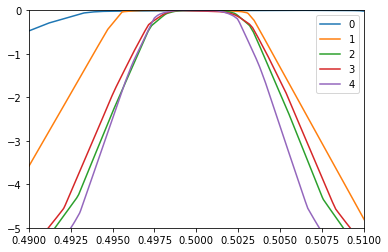

In [19]:
for i in range(NROUNDS):
    #plt.plot(post[i][0]['z'], np.exp(post[i][0]['lnL']), label=i)
    plt.plot(post[i][0]['z'], post[i][0]['lnL'], label=i)
plt.legend()
plt.xlim([0.49, 0.51])
plt.ylim([-5, 0])

In [17]:
net = sw.net_store[NROUNDS-1]
lnL = net(torch.tensor(x0).float().cuda(), torch.tensor(z0).float().cuda())
lnL

tensor([1.6045, 1.2510, 1.6377, 1.2037], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

In [4]:
isinstance([3], list)

True